# Credit Card Fraud Detection

Build a model to detect fraudulent credit card transactions. Use a
dataset containing information about credit card transactions, and
experiment with algorithms like Logistic Regression, Decision Trees,
or Random Forests to classify transactions as fraudulent or
legitimate.

In [28]:
# importing required libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [29]:
# load the dataset
data = pd.read_csv('fraudTrain.csv')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287015 entries, 0 to 287014
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             287015 non-null  int64  
 1   trans_date_trans_time  287015 non-null  object 
 2   cc_num                 287015 non-null  int64  
 3   merchant               287015 non-null  object 
 4   category               287015 non-null  object 
 5   amt                    287015 non-null  float64
 6   first                  287015 non-null  object 
 7   last                   287015 non-null  object 
 8   gender                 287015 non-null  object 
 9   street                 287015 non-null  object 
 10  city                   287015 non-null  object 
 11  state                  287015 non-null  object 
 12  zip                    287015 non-null  int64  
 13  lat                    287015 non-null  float64
 14  long                   287015 non-nu

In [31]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [32]:
# Print the shape of data
print(data.shape)
print(data.describe())

(287015, 23)
          Unnamed: 0        cc_num            amt            zip  \
count  287015.000000  2.870150e+05  287015.000000  287015.000000   
mean   143507.000000  4.164393e+17      70.943289   48782.546975   
std     82854.238093  1.307625e+18     158.107396   26902.186857   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%     71753.500000  1.800365e+14       9.640000   26041.000000   
50%    143507.000000  3.519607e+15      47.610000   48174.000000   
75%    215260.500000  4.642255e+15      83.360000   72011.000000   
max    287014.000000  4.992346e+18   17897.240000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  287015.000000  287015.000000  2.870150e+05  2.870140e+05   
mean       38.536095     -90.213759  8.977848e+04  1.331899e+09   
std         5.076141      13.766302  3.042728e+05  3.463403e+06   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.620500     -96.798000  7.

In [33]:
# Determine number of fraud cases in dataset
fraud = data[data['is_fraud']==1]
valid = data[data['is_fraud']==0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['is_fraud']==1])))
print('Valid Cases: {}'.format(len(data[data['is_fraud']==0])))

0.007607592848090378
Fraud Cases: 2167
Valid Cases: 284847


In [34]:
print("Amount details of fraud transactions.")
fraud.amt.describe()

Amount details of fraud transactions.


,amt
count,2167.000000
mean,517.090743
std,397.277666
min,1.180000
25%,116.610000
50%,350.750000
75%,901.410000
max,1334.070000


In [35]:
print("Amount details of valid transactions.")
valid.amt.describe()

Amount details of valid transactions.


,amt
count,284847.000000
mean,67.548925
std,149.874081
min,1.000000
25%,9.590000
50%,47.320000
75%,82.600000
max,17897.240000


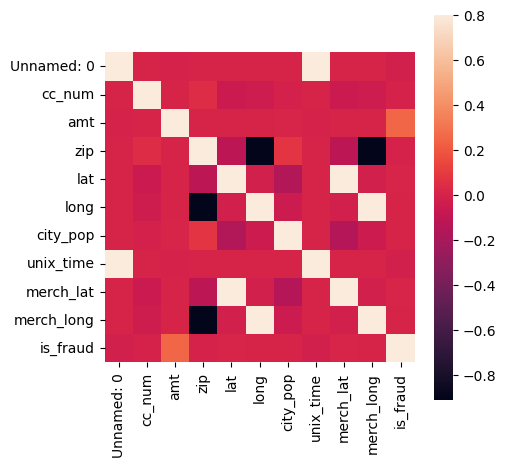

In [36]:
# Correlation Matrix
corrmat = data.select_dtypes(include=np.number).corr()
fig = plt.figure(figsize=(5,5))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# dividing x and y from dataset
x = data.drop(['is_fraud'], axis = 1)
y = data['is_fraud']
print(x.shape)
print(y.shape)

if 'trans_date_trans_time' in data.columns:

    # Handle inconsistent formats and missing leading zeros
    x['trans_date_trans_time'] = pd.to_datetime(x['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

    # Extract datetime features
    x['trans_date_trans_time_year'] = x['trans_date_trans_time'].dt.year
    x['trans_date_trans_time_month'] = x['trans_date_trans_time'].dt.month
    x['trans_date_trans_time_day'] = x['trans_date_trans_time'].dt.day
    x['trans_date_trans_time_hour'] = x['trans_date_trans_time'].dt.hour
    x['trans_date_trans_time_minute'] = x['trans_date_trans_time'].dt.minute
    x['trans_date_trans_time_second'] = x['trans_date_trans_time'].dt.second

    x = x.drop('trans_date_trans_time', axis=1)

for column in x.columns:
    if x[column].dtype == type(object):
        le = LabelEncoder()
        x[column] = le.fit_transform(x[column])

xData = x.values
yData = y.values

# Splitting the data into training and testing set
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
xTrain = imputer.fit_transform(xTrain)
xTest = imputer.transform(xTest)

if pd.isnull(yTrain).any():

  xTrain = xTrain[~pd.isnull(yTrain)]
  yTrain = yTrain[~pd.isnull(yTrain)]

(287015, 22)
(287015,)


In [ ]:
# Train the model
random = RandomForestClassifier()
random.fit(xTrain, yTrain)
yPred = random.predict(xTest)

In [12]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9970463593168101
The precision is 0.9583333333333334
The recall is 0.6865671641791045
The F1-Score is 0.8
The Matthews correlation coefficient is0.809845423077512


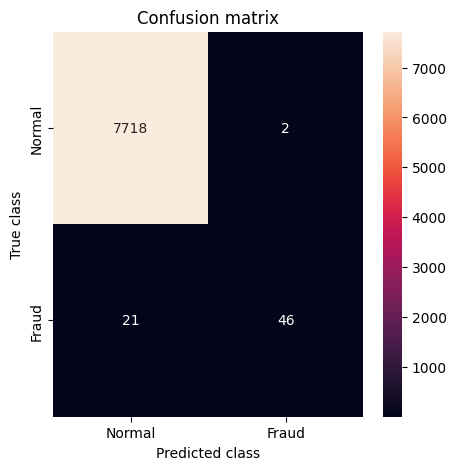

In [14]:
# printing the confusion matrix
label = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(5, 5))
sns.heatmap(conf_matrix, xticklabels = label,
            yticklabels = label, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()